In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Import data

In [2]:
eating = pd.read_csv('eating.csv')
date = eating.pop('date')
df_eating = pd.DataFrame({})
df_eating['date'] = date
df_eating['Quantity (oz.)'] = eating.fillna(0).transpose().cumsum().tail(1).transpose()['qty.9']

In [3]:
rx = pd.read_csv('rx.csv')

## Merge data

In [4]:
df_all = df_eating.merge(rx, left_on=['date'], right_on=['date'])
day_number = np.arange(len(df_all))
df_all['day since vet visit'] = day_number
#df_all.columns
#df_all['Quantity (oz.)'].tail(20)

## Plot Food Intake Data -- All

After Suvi's visit with the vet in May, she was **actively fed** by placing a food bowl in front of her on regular occasions, through the day.  This active feeding continued until the 21st of June 2021 when it was determined that Suvi had regained her regular mass of ~11.4 pounds.  After this active feeding regiment, I ensured that Suvi had food in her bowl but she approached it **naturally** when she was hungry, rather than me actively placing the bowl in front of her.

The data plotted in the following cells is the cumulative data of both "active" and "natural" feeding.

For about ~50 days, Suvi received oral dosing of Prednisolone (0.75 ml) every day.  After that, for about 1-week, she received this dosage every second day.  After this 1-week alternate day dosing, she has been receiving 0.75 ml Prednisolone once every 3 days.

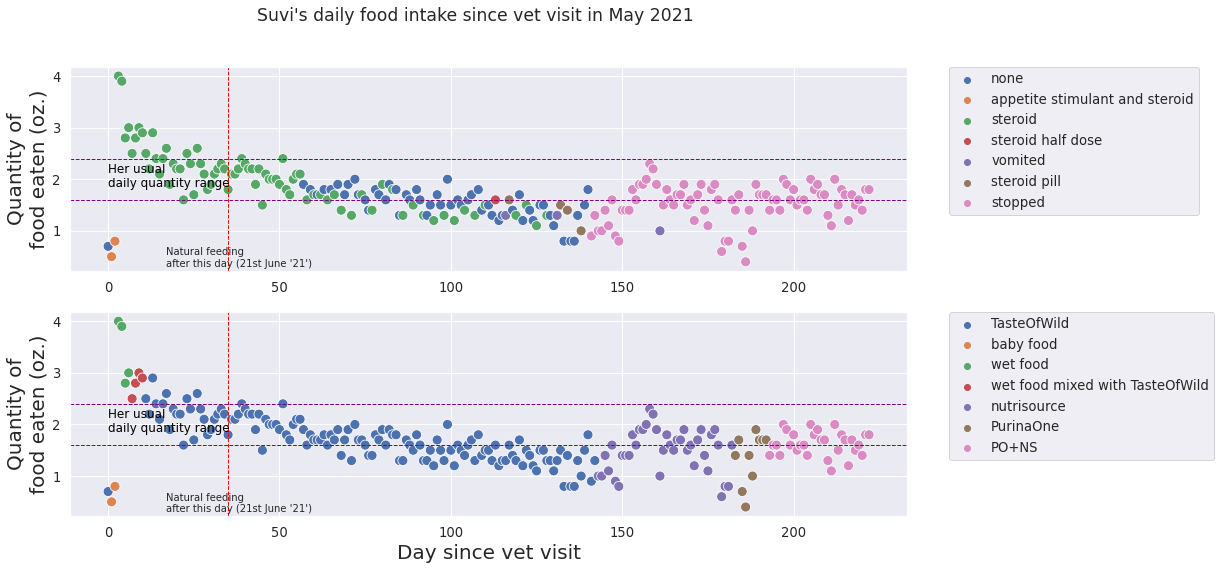

In [11]:
threshold = np.array(df_all[df_all['date'] == '6/21/2021']['day since vet visit'])


sns.set(font_scale = 1.2)
fig, axes = plt.subplots(2,1, sharey=True)
fig.suptitle('Suvi\'s daily food intake since vet visit in May 2021')
sns.scatterplot(ax = axes[0], data=df_all, y="Quantity (oz.)", x="day since vet visit", hue = 'rx', s=100)
axes[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[0].axhline(1.6, color='purple', linewidth = 1, linestyle='--')
axes[0].axhline(2.4, color='purple', linewidth = 1, linestyle='--')
axes[0].axvline(x=threshold[0], color = 'red', linewidth = 1, linestyle = '--')
axes[0].text(0.1, 1.85, "Her usual\ndaily quantity range", horizontalalignment='left', size='small', color='black')
axes[0].text(threshold[0]-18, 0.3, "Natural feeding\nafter this day (21st June '21')", fontsize = 10)
axes[0].set_xlabel(' ', fontsize=20)
axes[0].set_ylabel('Quantity of\nfood eaten (oz.)', fontsize=20)
#axes[0].legend(loc='upper left')
sns.scatterplot(ax = axes[1], data=df_all, y="Quantity (oz.)", x="day since vet visit", hue = 'type of food',
               s=100)
#plt.legend(loc='lower right')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[1].axhline(1.6, color='purple', linewidth = 1, linestyle='--')
axes[1].axhline(2.4, color='purple', linewidth = 1, linestyle='--')
axes[1].axvline(x=threshold[0], color = 'red', linewidth = 1, linestyle = '--')
axes[1].text(threshold[0]-18, 0.3, "Natural feeding\nafter this day (21st June '21')", fontsize = 10)
axes[1].text(0.1, 1.85, "Her usual\ndaily quantity range", horizontalalignment='left', size='small', color='black')
axes[1].set_xlabel('Day since vet visit', fontsize=20)
axes[1].set_ylabel('Quantity of\nfood eaten (oz.)', fontsize=20)
#axes[1].legend(loc='upper right')
fig.set_size_inches(15, 8.27)

plt.savefig('./suvi_all.png')

### Describe combinations of different medication regimen and food type -- all data

## All Data

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Quantity (oz.), dtype: float64

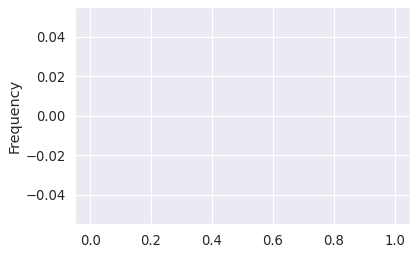

In [6]:
df_all[((df_all['rx'] == 'none') | (df_all['rx'] == 'steroid')) & (df_all['type of food'] == 'dry')]['Quantity (oz.)'].plot.hist()
df_all[((df_all['rx'] == 'none') | (df_all['rx'] == 'steroid')) & (df_all['type of food'] == 'dry')]['Quantity (oz.)'].describe()

In [ ]:
## No Rx and Dry food

In [7]:
df_all[((df_all['rx'] == 'none') ) & (df_all['type of food'] == 'dry')]['Quantity (oz.)'].plot.hist()
df_all[((df_all['rx'] == 'none') ) & (df_all['type of food'] == 'dry')]['Quantity (oz.)'].describe()

count    49.000000
mean      1.555102
std       0.281411
min       0.700000
25%       1.400000
50%       1.600000
75%       1.800000
max       2.000000
Name: Quantity (oz.), dtype: float64

In [10]:
## Steroid and dry food

In [8]:
df_all[((df_all['rx'] == 'steroid') ) & (df_all['type of food'] == 'dry')]['Quantity (oz.)'].plot.hist()
df_all[((df_all['rx'] == 'steroid') ) & (df_all['type of food'] == 'dry')]['Quantity (oz.)'].describe()

count    70.000000
mean      1.904286
std       0.412639
min       1.100000
25%       1.600000
50%       1.950000
75%       2.200000
max       2.900000
Name: Quantity (oz.), dtype: float64

In [14]:
df_all.columns


Index(['date', 'Quantity (oz.)', 'type of food', 'rx', 'day since vet visit'], dtype='object')

### Describe daily food intake after 21st June 2021

Until 21st of June, Suvi was actively fed by placing a food bowl in front of her on a regular basis, throughout the day.  After the 21st of June, active feeding was stopped.  This led to Suvi regaining her usual habits of approaching her food bowl when she was hungry. 

In the cells that follow, *6/21/2021* is a threshold date, after which, her eating habits are natural.

In [9]:
threshold = df_all[df_all['date'] == '6/21/2021']['day since vet visit']
df_unassisted = df_all[df_all['day since vet visit'] >= 35]

In [10]:
sns.set(font_scale = 1.2)
fig, axes = plt.subplots(2,1, sharey=True)
fig.suptitle('Suvi\'s daily food intake since 21st June 2021')
sns.scatterplot(ax = axes[0], data=df_unassisted, y="Quantity (oz.)", x="day since vet visit", hue = 'rx', s=100)
axes[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[0].axhline(1.6, color='purple', linewidth = 1, linestyle='--')
axes[0].axhline(2.4, color='purple', linewidth = 1, linestyle='--')
axes[0].text(35, 1.85, "Her usual\ndaily quantity range", horizontalalignment='left', size='small', color='black')
axes[0].set_xlabel(' ', fontsize=20)
axes[0].set_ylabel('Quantity of\nfood eaten (oz.)', fontsize=20)
axes[0].legend(loc='upper right')
sns.scatterplot(ax = axes[1], data=df_unassisted, y="Quantity (oz.)", x="day since vet visit", hue = 'type of food',
               s=100)
#plt.legend(loc='lower right')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[1].axhline(1.6, color='purple', linewidth = 1, linestyle='--')
axes[1].axhline(2.4, color='purple', linewidth = 1, linestyle='--')
axes[1].text(35, 1.85, "Her usual\ndaily quantity range", horizontalalignment='left', size='small', color='black')
axes[1].set_xlabel('Day since vet visit', fontsize=20)
axes[1].set_ylabel('Quantity of\nfood eaten (oz.)', fontsize=20)
axes[1].legend(loc='upper right')
fig.set_size_inches(10, 8.27)

plt.savefig('./suvi_unassisted.png')

### Describing Suvi's eating habits after 21st June 2021

#### All data -- since 21st June 2021

count    88.000000
mean      1.690909
std       0.299669
min       1.200000
25%       1.500000
50%       1.700000
75%       1.900000
max       2.400000
Name: Quantity (oz.), dtype: float64


(1.0, 2.5)

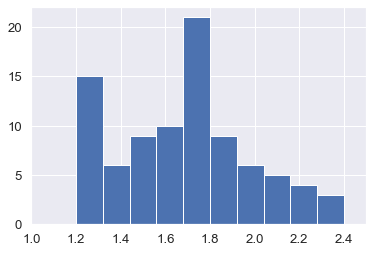

In [14]:
print(df_unassisted['Quantity (oz.)'].describe())
plt.hist(df_unassisted['Quantity (oz.)'])
plt.xlim([1, 2.5])

#### With no medication

count    41.000000
mean      1.626829
std       0.215667
min       1.200000
25%       1.500000
50%       1.700000
75%       1.800000
max       2.000000
Name: Quantity (oz.), dtype: float64


(1.0, 2.5)

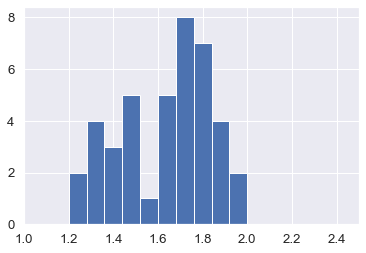

In [15]:
print(df_unassisted[df_unassisted['rx'] == 'none']['Quantity (oz.)'].describe())
#df_unassisted[df_unassisted['rx'] == 'none']['Quantity (oz.)'].plot.hist()
plt.hist(df_unassisted[df_unassisted['rx'] == 'none']['Quantity (oz.)'])
plt.xlim([1, 2.5])

#### With Steroid

count    44.000000
mean      1.763636
std       0.353778
min       1.200000
25%       1.475000
50%       1.750000
75%       2.100000
max       2.400000
Name: Quantity (oz.), dtype: float64


(1.0, 2.5)

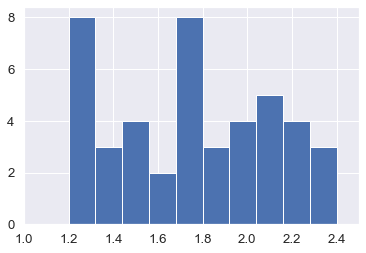

In [16]:
print(df_unassisted[df_unassisted['rx'] == 'steroid']['Quantity (oz.)'].describe())
plt.hist(df_unassisted[df_unassisted['rx'] == 'steroid']['Quantity (oz.)'])
plt.xlim([1, 2.5])

### 

### Food intake trend since 21st June 2021

In [11]:
from scipy import stats

In [12]:
ax = sns.regplot(data = df_unassisted, x="day since vet visit", y="Quantity (oz.)")
ax.set_title('Food intake trend since 21st June 2021\n(with and w/o Rx)')
ax.set(ylim=(0,4))
stats.linregress(df_unassisted['day since vet visit'],
                 df_unassisted['Quantity (oz.)']) #df_unassisted, x="day since vet visit", y="Quantity (oz.)"

LinregressResult(slope=-0.008430843084308434, intercept=2.354406240624063, rvalue=-0.7679164366146045, pvalue=1.1458634819274999e-20, stderr=0.000710390367054113, intercept_stderr=0.06343392188155902)

In [13]:
ax = sns.regplot(data = df_unassisted[df_unassisted['rx'] == 'steroid'], x="day since vet visit", y="Quantity (oz.)")
ax.set_title('Food intake trend since 21st June 2021\n(with Rx = Steroid)')
ax.set(ylim=(0,4))
stats.linregress(df_unassisted[df_unassisted['rx'] == 'steroid']['day since vet visit'],
                 df_unassisted[df_unassisted['rx'] == 'steroid']['Quantity (oz.)']) #df_unassisted, x="day since vet visit", y="Quantity (oz.)"

LinregressResult(slope=-0.01078423792588011, intercept=2.475271893201381, rvalue=-0.8080645787873294, pvalue=1.1311836159180097e-11, stderr=0.0011852271374506846, intercept_stderr=0.087039932885913)

In [15]:
ax = sns.regplot(data = df_unassisted[df_unassisted['rx'] == 'none'], x="day since vet visit", y="Quantity (oz.)")
ax.set_title('Food intake trend since 21st June 2021\n(with no Rx)')
ax.set(ylim=(0,4))
stats.linregress(df_unassisted[df_unassisted['rx'] == 'none']['day since vet visit'],
                 df_unassisted[df_unassisted['rx'] == 'none']['Quantity (oz.)']) #df_unassisted, x="day since vet visit", y="Quantity (oz.)"

LinregressResult(slope=-0.008203670237680098, intercept=2.3534617078226043, rvalue=-0.7006703952062889, pvalue=2.947489375339454e-08, stderr=0.0012316871850059636, intercept_stderr=0.12015725054035103)

## Last "n" days

In [29]:
n=60;
df_lastn = df_all.tail(n)
df_lastn.columns

Index(['date', 'Quantity (oz.)', 'type of food', 'rx', 'day since vet visit'], dtype='object')

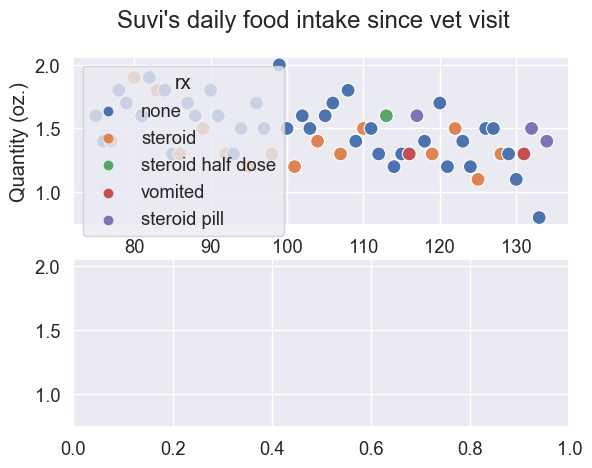

In [30]:
sns.set(font_scale = 1.2)
fig, axes = plt.subplots(2,1, sharey=True)
fig.suptitle('Suvi\'s daily food intake since vet visit')
sns.scatterplot(ax = axes[0], data=df_lastn, y=df_lastn["Quantity (oz.)"], x=df_lastn["day since vet visit"], hue = 'rx', s=100)
plt.show()